In [1]:
# Initialized Logger
import torch
import torch.optim as optim
from torchvision import datasets
from torchsummary import summary
from model import Net
from utils import data_transformation,get_device, \
                  fit_model, plot_accuracy_report, \
                  show_random_results, plot_misclassified, \
                  calculate_accuracy_per_class

CODE BLOCK: 2

In [2]:
# CUDA?
device = get_device()
print("Available Device :: ", device)

Available Device ::  cpu


CODE BLOCK: 3

In [3]:
transformation_matrix = {"image_size":(28,28),
                         "random_rotation_angle":(-5.0, 5.0),
                         "mean_of_data":(0.1307,),
                         "std_of_data": (0.3081,),
                         "center_crop_size": (24,24),
                         "center_crop_probability" : 0.1,
                         }

dataloader_kwargs = {'batch_size': 64, 'shuffle': True, 'num_workers': 1, 'pin_memory': True}


train_transforms, test_transforms = data_transformation(transformation_matrix)
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

train_loader = torch.utils.data.DataLoader(train_data, **dataloader_kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **dataloader_kwargs)

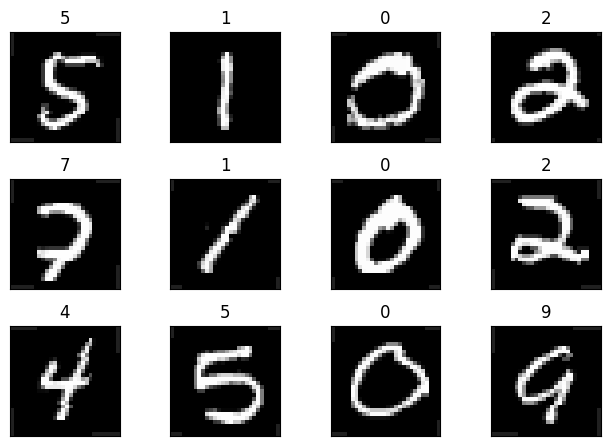

In [4]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [5]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              36
              ReLU-2            [-1, 4, 26, 26]               0
       BatchNorm2d-3            [-1, 4, 26, 26]               8
           Dropout-4            [-1, 4, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             360
              ReLU-6           [-1, 10, 24, 24]               0
       BatchNorm2d-7           [-1, 10, 24, 24]              20
           Dropout-8           [-1, 10, 24, 24]               0
         MaxPool2d-9           [-1, 10, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]              80
             ReLU-11            [-1, 8, 12, 12]               0
      BatchNorm2d-12            [-1, 8, 12, 12]              16
          Dropout-13            [-1, 8, 12, 12]               0
           Conv2d-14            [-1, 4,

In [6]:
training_parameters = {"learning_rate":0.01,
                       "momentum":0.9,
                       "step_size":6,
                       "gamma":0.3,
                       "max_lr":0.017,
                       "num_epochs":1
                       }
train_losses, test_losses, train_acc, test_acc = fit_model(model,training_parameters,train_loader,test_loader,device)

Training Progress: 100%|██████████| 1/1 [00:46<00:00, 46.18s/it, Train Loss=0.2599, Test Loss=0.0659, Train Acc=92.97%, Test Acc=97.91%]

Test set: Average loss: 0.0659, Accuracy: 9791/10000 (97.91%)


In [7]:
grid_size = (4,4)
show_random_results(test_loader,grid_size,model,device)

In [8]:
grid_size = (4,4)
plot_misclassified(model,grid_size,test_loader,device)

In [9]:
calculate_accuracy_per_class(model,device,test_loader,test_data)

Calculating class accuracies: 100%|██████████| 157/157 [00:05<00:00, 29.22it/s]


{' zero': 98.6842105263158,
 ' one': 100.0,
 ' two': 100.0,
 ' three': 98.69281045751634,
 ' four': 96.20253164556962,
 ' five': 97.38562091503267,
 ' six': 98.08917197452229,
 ' seven': 96.02649006622516,
 ' eight': 98.64864864864865,
 ' nine': 97.27891156462584}